<a href="https://colab.research.google.com/github/SarmenSinanian/DS-Unit-2-Applied-Modeling/blob/master/Sarmen_Sinanian_assignment_applied_modeling_PROJECT_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Plot the distribution of your target. 
    - Regression problem: Is your target skewed? Then, log-transform it.
    - Classification: Are your classes imbalanced? Then, don't use just accuracy. And try `class_balance` parameter in scikit-learn.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline?
- [ ] Share at least 1 visualization on Slack.

You need to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

### Today
- [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)
- [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/)
- [Machine Learning Meets Economics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)


### Yesterday
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)






In [0]:
# conda install -c conda-forge category_encoders

In [0]:
# conda update -n base -c defaults conda

In [0]:
# pip install --upgrade category_encoders

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# ASSIGNMENT 1 BELOW (ASSIGNMENT 2 FURTHER DOWN)

In [0]:
columns = ['Date','Adj Close','Volume']

# BELOW DATASET FROM https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=728294400&period2=1566889200&interval=1d&events=history&crumb=ixT1ci5YI3E

In [0]:
spy = pd.read_csv(r'E:\Desktop\Lambda School\Assignments\Unit 2 Sprint 7 PROJECT\SPY.csv',
                  usecols = columns)

In [0]:
spy.head()

,Date,Adj Close,Volume
0,1993-01-29,26.706757,1003200
1,1993-02-01,26.896694,480500
2,1993-02-02,26.953669,201300
3,1993-02-03,27.238594,529400
4,1993-02-04,27.352570,531500


In [0]:
spy['Date'] = pd.to_datetime(spy['Date'])

In [0]:
spy.dtypes

Date         datetime64[ns]
Adj Close           float64
Volume                int64
dtype: object

C:\Users\Sarmen\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


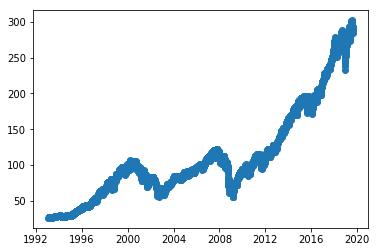

In [0]:
plt.plot_date(spy['Date'], spy['Adj Close'])

In [0]:
# spy = pd.read_csv(f'E:\Desktop\Lambda School\Data Sets\Data Visualization and Storytelling Project\price-volume-data-for-all-us-stocks-etfs\Data\ETFs\\spy.us.txt',
#                           usecols = columns)

In [0]:
spy.columns = ['Date','Adj_Close','Volume']

In [0]:
spy.head()

,Date,Adj_Close,Volume
0,1993-01-29,26.706757,1003200
1,1993-02-01,26.896694,480500
2,1993-02-02,26.953669,201300
3,1993-02-03,27.238594,529400
4,1993-02-04,27.352570,531500


In [0]:
spy.describe()

,Adj_Close,Volume
count,6692.000000,6.692000e+03
mean,111.609154,8.431367e+07
std,65.611232,9.810203e+07
min,26.383823,5.200000e+03
25%,71.542696,7.017450e+06
50%,93.903874,5.707685e+07
75%,128.059433,1.226404e+08
max,302.010010,8.710263e+08


In [0]:
spy.shape

(6692, 3)

# Choose your target. Which column in your tabular dataset will you predict?


In [0]:
# PRICE(CLOSE) IS THE TARGET
# THIS--->***OR PRICE(CLOSE) NEXT DAY ABOVE/BELOW PREVIOUS DAY BASED ON ROLLING MEAN(SMA) OR RELATIVE STRENGTH (RSI)***

# Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.


In [0]:
spy.isna().sum()

Date         0
Adj_Close    0
Volume       0
dtype: int64

### *WILL USE ALL SPY (S&P 500 ETF) DATA*

# Determine whether your problem is regression or classification.


### *CLASSIFICATION (IS THIS TICKER OVER/UNDER THE X_DAY ROLLING MEAN ***AND*** ALSO OVER/UNDER BOUGHT ON THE RSI?)*
### *AKA 3 WAY CONFUSION MATRIX WITH UNDER TO BOTH AS THE HIGHEST LIKELIHOOD PREDICTOR OF NEXT DAY/WEEKS/MONTHS POSITIVE RETURNS*

# Choose your evaluation metric.

### WILL USE ACCURACY SCORE

# Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.


In [0]:
spy.head()

,Date,Adj_Close,Volume
0,1993-01-29,26.706757,1003200
1,1993-02-01,26.896694,480500
2,1993-02-02,26.953669,201300
3,1993-02-03,27.238594,529400
4,1993-02-04,27.352570,531500


In [0]:
spy.dtypes

Date         datetime64[ns]
Adj_Close           float64
Volume                int64
dtype: object

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
spy['Date'] = pd.to_datetime(spy['Date'])
spy['Year'] = spy['Date'].dt.year

In [0]:
spy.head()

,Date,Adj_Close,Volume,Year
0,1993-01-29,26.706757,1003200,1993
1,1993-02-01,26.896694,480500,1993
2,1993-02-02,26.953669,201300,1993
3,1993-02-03,27.238594,529400,1993
4,1993-02-04,27.352570,531500,1993


In [0]:
spy.dtypes

Date         datetime64[ns]
Adj_Close           float64
Volume                int64
Year                  int64
dtype: object

### *NEITHER .ROLLING_MEAN NOR .ROLLING WORK*

In [0]:
# spy['SMA'] = spy['Close'].rolling(window = 14, min_periods = 14, axis = 0)

In [0]:
# spy['SMA'] = pd.rolling_mean(spy['Close'], min_periods = 14, window = 14)

In [0]:
spy.isnull().sum()

Date         0
Adj_Close    0
Volume       0
Year         0
dtype: int64

In [0]:
spy.head()

,Date,Adj_Close,Volume,Year
0,1993-01-29,26.706757,1003200,1993
1,1993-02-01,26.896694,480500,1993
2,1993-02-02,26.953669,201300,1993
3,1993-02-03,27.238594,529400,1993
4,1993-02-04,27.352570,531500,1993


In [0]:
spy.head()

,Date,Adj_Close,Volume,Year
0,1993-01-29,26.706757,1003200,1993
1,1993-02-01,26.896694,480500,1993
2,1993-02-02,26.953669,201300,1993
3,1993-02-03,27.238594,529400,1993
4,1993-02-04,27.352570,531500,1993


# Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.


In [0]:
spy['SMA'] = spy.Adj_Close.rolling(window=14).mean()

In [0]:
spy.head(14)

,Date,Adj_Close,Volume,Year,SMA
0,1993-01-29,26.706757,1003200,1993,NaN
1,1993-02-01,26.896694,480500,1993,NaN
2,1993-02-02,26.953669,201300,1993,NaN
3,1993-02-03,27.238594,529400,1993,NaN
4,1993-02-04,27.352570,531500,1993,NaN
5,1993-02-05,27.333586,492100,1993,NaN
6,1993-02-08,27.333586,596100,1993,NaN
7,1993-02-09,27.143635,122100,1993,NaN
8,1993-02-10,27.181616,379600,1993,NaN
9,1993-02-11,27.314577,19500,1993,NaN


In [0]:
spy.tail()

,Date,Adj_Close,Volume,Year,SMA
6687,2019-08-20,290.089996,51596400,2019,289.480711
6688,2019-08-21,292.450012,49524700,2019,289.309997
6689,2019-08-22,292.359985,51666400,2019,289.291425
6690,2019-08-23,284.850006,149161500,2019,289.364997
6691,2019-08-26,288.000000,72423800,2019,289.379283


In [0]:
spy.isna().sum()

Date          0
Adj_Close     0
Volume        0
Year          0
SMA          13
dtype: int64

In [0]:
spy.dtypes

Date         datetime64[ns]
Adj_Close           float64
Volume                int64
Year                  int64
SMA                 float64
dtype: object

In [0]:
# spy['Close_Higher'] = np.where(spy['Close'] > spy['Close'].shift(-1), 'True','False')

In [0]:
# spy_numeric = ['Close']

In [0]:
spy['Above_14D_SMA_Yesterday'] = np.where(spy['SMA'].shift(1)>spy['Adj_Close'].shift(1), 0,1)

In [0]:
# spy['Above_14D_SMA_Yesterday'] = np.where(spy['SMA']>spy['Close'], 'True','False')

In [0]:
spy.Above_14D_SMA_Yesterday.value_counts(normalize=True)

1    0.62104
0    0.37896
Name: Above_14D_SMA_Yesterday, dtype: float64

In [0]:
spy_numeric_diff = spy[['Adj_Close']].diff()[1:]
# cond1 = spy_numeric_diff[['Close']] >=0
spy['Close_Higher_Than_Yesterday'] = np.insert(np.where(spy_numeric_diff[['Adj_Close']] >=0, '1','0'), 0, np.nan)

In [0]:
spy.Close_Higher_Than_Yesterday.value_counts(normalize=True)

1    0.546473
0    0.453377
n    0.000149
Name: Close_Higher_Than_Yesterday, dtype: float64

In [0]:
y_train = spy['Close_Higher_Than_Yesterday']

In [0]:
majority_class = y_train.mode()[0]

In [0]:
y_pred = [majority_class]*len(y_train)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.5464734010759116

# Begin to clean and explore your data.

### *I BELIEVE THIS IS ALREADY DONE*

In [0]:
spy_2019 = spy[spy['Year'] == 2019]
spy_2018 = spy[spy['Year'] == 2018]
spy_2017 = spy[spy['Year'] == 2017]
spy_2016 = spy[spy['Year'] == 2016]
spy_2015 = spy[spy['Year'] == 2015]
spy_2014 = spy[spy['Year'] == 2014]
spy_2013 = spy[spy['Year'] == 2013]
spy_2012 = spy[spy['Year'] == 2012]
spy_2011 = spy[spy['Year'] == 2011]
spy_2010 = spy[spy['Year'] == 2010]
spy_2009 = spy[spy['Year'] == 2009]
spy_2008 = spy[spy['Year'] == 2008]
spy_2007 = spy[spy['Year'] == 2007]
spy_2006 = spy[spy['Year'] == 2006]
spy_2005 = spy[spy['Year'] == 2005]
spy_2004 = spy[spy['Year'] == 2004]
spy_2003 = spy[spy['Year'] == 2003]
spy_2002 = spy[spy['Year'] == 2002]
spy_2001 = spy[spy['Year'] == 2001]
spy_2000 = spy[spy['Year'] == 2000]
spy_1999 = spy[spy['Year'] == 1999]
spy_1998 = spy[spy['Year'] == 1998]
spy_1997 = spy[spy['Year'] == 1997]
spy_1996 = spy[spy['Year'] == 1996]
spy_1995 = spy[spy['Year'] == 1995]
spy_1994 = spy[spy['Year'] == 1994]
spy_1993 = spy[spy['Year'] == 1993]

# END ASSIGNMENT 1

# ASSIGNMENT 2 BELOW

# You need to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

# Plot the distribution of your target.
### Regression problem: Is your target skewed? Then, log-transform it.
### Classification: Are your classes imbalanced? Then, don't use just accuracy. And try class_balance parameter in scikit-learn.


 

In [0]:
spy.tail(25)

,Date,Adj_Close,Volume,Year,SMA,Above_14D_SMA_Yesterday,Close_Higher_Than_Yesterday
6667,2019-07-23,300.029999,44564500,2019,298.717139,0,1
6668,2019-07-24,301.440002,47213200,2019,298.905711,1,1
6669,2019-07-25,300.000000,55394100,2019,299.015712,1,0
6670,2019-07-26,302.010010,45084100,2019,299.386427,1,1
6671,2019-07-29,301.459991,38126500,2019,299.691426,1,0
6672,2019-07-30,300.720001,45849000,2019,299.842141,1,0
6673,2019-07-31,297.429993,104245200,2019,299.707855,1,0
6674,2019-08-01,294.839996,142646600,2019,299.292855,0,0
6675,2019-08-02,292.619995,116749700,2019,298.712141,0,0
6676,2019-08-05,283.820007,178745400,2019,297.572141,0,0


In [0]:
spy_2010_2013 = pd.concat([spy_2010,spy_2011,spy_2012,spy_2013])
spy_2010_2013.describe()

,Adj_Close,Volume,Year,SMA,Above_14D_SMA_Yesterday
count,1006.000000,1.006000e+03,1006.000000,1006.000000,1006.000000
mean,117.153569,1.732549e+08,2011.499006,116.692673,0.655070
std,19.806880,8.381083e+07,1.119479,19.475775,0.475582
min,85.226967,4.536880e+07,2010.000000,88.523356,0.000000
25%,100.767940,1.193304e+08,2010.250000,100.621274,0.000000
50%,113.469593,1.528885e+08,2011.000000,113.022845,1.000000
75%,127.992760,2.095557e+08,2012.750000,126.698444,1.000000
max,165.726135,7.178287e+08,2013.000000,162.317449,1.000000


In [0]:
target = ['Close_Higher_Than_Yesterday']
drop = ['Date','Year']


train = spy_2010_2013.drop(columns=drop)
test = spy_2017.drop(columns=drop)
val = spy_2019.drop(columns=drop)

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

X_train = train.drop(columns=target)
y_train = train[target]

In [0]:
X_test.head()

,Adj_Close,Volume,SMA,Above_14D_SMA_Yesterday
6026,214.830276,91366500,214.879511,0
6027,216.108322,78744400,214.890042,0
6028,215.936646,78379000,215.015637,1
6029,216.709229,71559900,215.133430,1
6030,215.993881,46939700,215.230171,1


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [0]:
pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

C:\Users\Sarmen\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Validation Accuracy 0.524390243902439


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

y_pred = pipeline.predict(X_val)

confusion_matrix(y_val, y_pred)

array([[28, 40],
       [38, 58]], dtype=int64)

In [0]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    return columns, index

plot_confusion_matrix(y_val, y_pred)

(['Predicted 0', 'Predicted 1'], ['Actual 0', 'Actual 1'])

In [0]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return table

plot_confusion_matrix(y_val, y_pred)

,Predicted 0,Predicted 1
Actual 0,28,40
Actual 1,38,58


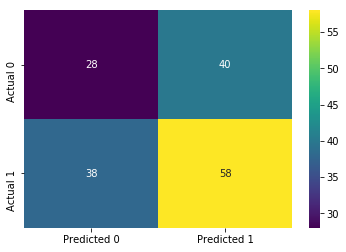

In [0]:
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.41      0.42        68
           1       0.59      0.60      0.60        96

   micro avg       0.52      0.52      0.52       164
   macro avg       0.51      0.51      0.51       164
weighted avg       0.52      0.52      0.52       164



# Continue to clean and explore your data. Make exploratory visualizations.

In [0]:
# def RSI

In [0]:
# # dUp= delta[delta > 0]
# # dDown= delta[delta < 0]

# # dUp = dUp.reindex_like(delta, fill_value=0)
# # dDown = dDown.reindex_like(delta, fill_value=0)

# # # Get data
# # data = pd.DataReader('AAPL', 'yahoo', start, end)
# # # Get just the close
# # close = data['Adj Close']

# Close = spy['Close']

# # # Get the difference in price from previous step
# # delta = close.diff()

# delta = Close.diff()


# dUp, dDown = delta.copy(), delta.copy()



# # dUp[dUp < 0] = 0
# # dDown[dDown > 0] = 0

# dUp[dUp < 0] = 0
# dDown[dDown > 0] = 0


# spy['dUp'] = dUp
# spy['dDown'] = dDown.abs()
# spy.head()

# spy['dUp'] = spy['dUp'].rolling(14)

# # RolUp = dUp.rolling(14)
# # RolDown = dDown.rolling(14)
# # RolDown = RolDown.abs()

# # RS = RolUp / RolDown

In [0]:
# import pandas.io.data
import pandas as pd
# import datetime
# import matplotlib.pyplot as plt

# # Window length for moving average
# window_length = 14

# # Dates
# start = datetime.datetime(2010, 1, 1)
# end = datetime.datetime(2013, 1, 27)

# # # Get data
# # data = pd.DataReader('AAPL', 'yahoo', start, end)
# # # Get just the close
# # close = data['Adj Close']

Close = spy['Adj_Close']

# # Get the difference in price from previous step
# delta = close.diff()

delta = Close.diff()

# # Get rid of the first row, which is NaN since it did not have a previous 
# # row to calculate the differences
delta = delta[1:] 

# # Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# # Calculate the EWMA
# roll_up1 = pandas.stats.moments.ewma(up, window_length)
# roll_down1 = pandas.stats.moments.ewma(down.abs(), window_length)

# roll_up1 = up.ewm(14)
# roll_down1 = down.ewm(14)

# roll_up1,roll_down1

spy['Roll_Up'] = up
spy['Roll_Down'] = down.abs()

spy['Roll_Up'] = spy['Roll_Up'].ewm(com=14).mean()
spy['Roll_Down'] = spy['Roll_Down'].ewm(com=14).mean()

# spy.tail()

# # Calculate the RSI based on EWMA
# RS1 = roll_up1 / roll_down1
# RSI1 = 100.0 - (100.0 / (1.0 + RS1))

RS1 = spy['Roll_Up'] / spy['Roll_Down']
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

spy['RSI'] = RSI1
# spy.tail()

# # Calculate the SMA
# roll_up2 = pandas.rolling_mean(up, window_length)
# roll_down2 = pandas.rolling_mean(down.abs(), window_length)

# # Calculate the RSI based on SMA
# RS2 = roll_up2 / roll_down2
# RSI2 = 100.0 - (100.0 / (1.0 + RS2))

# # Compare graphically
# plt.figure()
# RSI1.plot()
# RSI2.plot()
# plt.legend(['RSI via EWMA', 'RSI via SMA'])
# plt.show()
# up.head()

spy.tail()

,Date,Adj_Close,Volume,Year,SMA,Above_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,RSI
6687,2019-08-20,290.089996,51596400,2019,289.480711,1,0,1.350305,1.501479,47.349492
6688,2019-08-21,292.450012,49524700,2019,289.309997,1,1,1.417619,1.401380,50.288029
6689,2019-08-22,292.359985,51666400,2019,289.291425,1,0,1.323111,1.313957,50.173577
6690,2019-08-23,284.850006,149161500,2019,289.364997,1,0,1.234904,1.727025,41.692561
6691,2019-08-26,288.000000,72423800,2019,289.379283,0,1,1.362577,1.611890,45.809110


In [0]:
spy['Overbought_Yesterday'] = spy['RSI'].shift(1) > 60.0
spy['Oversold_Yesterday'] = spy['RSI'].shift(1) < 40.0

In [0]:
spy['Overbought_Yesterday'].replace(to_replace=False,value=0, inplace=True)
spy['Oversold_Yesterday'].replace(to_replace=False,value=0, inplace=True)

In [0]:
spy.head()

,Date,Adj_Close,Volume,Year,SMA,Above_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,RSI,Overbought_Yesterday,Oversold_Yesterday
0,1993-01-29,26.706757,1003200,1993,NaN,1,n,NaN,NaN,NaN,0.0,0.0
1,1993-02-01,26.896694,480500,1993,NaN,1,1,0.189937,0.0,100.0,0.0,0.0
2,1993-02-02,26.953669,201300,1993,NaN,1,1,0.121164,0.0,100.0,1.0,0.0
3,1993-02-03,27.238594,529400,1993,NaN,1,1,0.179557,0.0,100.0,1.0,0.0
4,1993-02-04,27.352570,531500,1993,NaN,1,1,0.161428,0.0,100.0,1.0,0.0


In [0]:
spy['Oversold_And_Under_14D_SMA_Yesterday'] = ((spy['Overbought_Yesterday'] ==1) & (spy['Above_14D_SMA_Yesterday'] == 0))

In [0]:
spy['Oversold_And_Under_14D_SMA_Yesterday'].replace(to_replace=False,value=0, inplace=True)

In [0]:
spy.head()

,Date,Adj_Close,Volume,Year,SMA,Above_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,RSI,Overbought_Yesterday,Oversold_Yesterday,Oversold_And_Under_14D_SMA_Yesterday
0,1993-01-29,26.706757,1003200,1993,NaN,1,n,NaN,NaN,NaN,0.0,0.0,0.0
1,1993-02-01,26.896694,480500,1993,NaN,1,1,0.189937,0.0,100.0,0.0,0.0,0.0
2,1993-02-02,26.953669,201300,1993,NaN,1,1,0.121164,0.0,100.0,1.0,0.0,0.0
3,1993-02-03,27.238594,529400,1993,NaN,1,1,0.179557,0.0,100.0,1.0,0.0,0.0
4,1993-02-04,27.352570,531500,1993,NaN,1,1,0.161428,0.0,100.0,1.0,0.0,0.0


In [0]:
# delta.head()

In [0]:
# spy.head()

In [0]:
spy.Oversold_And_Under_14D_SMA_Yesterday.value_counts()

0.0    6666
1.0      26
Name: Oversold_And_Under_14D_SMA_Yesterday, dtype: int64

In [0]:
spy_2019 = spy[spy['Year'] == 2019]
spy_2018 = spy[spy['Year'] == 2018]
spy_2017 = spy[spy['Year'] == 2017]
spy_2016 = spy[spy['Year'] == 2016]
spy_2015 = spy[spy['Year'] == 2015]
spy_2014 = spy[spy['Year'] == 2014]
spy_2013 = spy[spy['Year'] == 2013]
spy_2012 = spy[spy['Year'] == 2012]
spy_2011 = spy[spy['Year'] == 2011]
spy_2010 = spy[spy['Year'] == 2010]
spy_2009 = spy[spy['Year'] == 2009]
spy_2008 = spy[spy['Year'] == 2008]
spy_2007 = spy[spy['Year'] == 2007]
spy_2006 = spy[spy['Year'] == 2006]
spy_2005 = spy[spy['Year'] == 2005]
spy_2004 = spy[spy['Year'] == 2004]
spy_2003 = spy[spy['Year'] == 2003]
spy_2002 = spy[spy['Year'] == 2002]
spy_2001 = spy[spy['Year'] == 2001]
spy_2000 = spy[spy['Year'] == 2000]
spy_1999 = spy[spy['Year'] == 1999]
spy_1998 = spy[spy['Year'] == 1998]
spy_1997 = spy[spy['Year'] == 1997]
spy_1996 = spy[spy['Year'] == 1996]
spy_1995 = spy[spy['Year'] == 1995]
spy_1994 = spy[spy['Year'] == 1994]
spy_1993 = spy[spy['Year'] == 1993]

In [0]:
spy_1994_2013 = spy[(spy['Year'] >= 1994) & (spy['Year'] <=2013)]

In [0]:
spy_2010_2013 = pd.concat([spy_2010,spy_2011,spy_2012,spy_2013])
spy_2010_2013.head()

,Date,Adj_Close,Volume,Year,SMA,Above_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,RSI,Overbought_Yesterday,Oversold_Yesterday,Oversold_And_Under_14D_SMA_Yesterday
4264,2010-01-04,93.675278,118944600,2010,92.269357,1,1,0.368288,0.218026,62.814054,0.0,0.0,0.0
4265,2010-01-05,93.923241,111579900,2010,92.408639,1,1,0.360266,0.203491,63.904444,1.0,0.0,0.0
4266,2010-01-06,93.989357,116074400,2010,92.583177,1,1,0.340656,0.189925,64.204303,1.0,0.0,0.0
4267,2010-01-07,94.386139,131091100,2010,92.776076,1,1,0.344398,0.177264,66.019413,1.0,0.0,0.0
4268,2010-01-08,94.700218,126402800,2010,93.070099,1,1,0.342377,0.165446,67.420504,1.0,0.0,0.0


In [0]:
spy_2010_2013.columns

Index(['Date', 'Adj_Close', 'Volume', 'Year', 'SMA', 'Above_14D_SMA_Yesterday',
       'Close_Higher_Than_Yesterday', 'Roll_Up', 'Roll_Down', 'RSI',
       'Overbought_Yesterday', 'Oversold_Yesterday',
       'Oversold_And_Under_14D_SMA_Yesterday'],
      dtype='object')

In [0]:
target = 'Close_Higher_Than_Yesterday'
drop = ['Date','Year','SMA','Volume','Adj_Close','Roll_Up','Roll_Down']
# drop = ['Date','Year','SMA','Volume','Adj_Close','Roll_Up','Roll_Down', 'Above_14D_SMA_Yesterday',
#         'Overbought_Yesterday','RSI']


train = spy_1994_2013.drop(columns=drop)
test = spy_2015.drop(columns=drop)
val = spy_2017.drop(columns=drop)

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

X_train = train.drop(columns=target)
y_train = train[target]

# BELOW THROWS ERROR WHEN USING Y STRATIFICATION

In [0]:
# target = 'Close_Higher_Than_Yesterday'
# drop = ['Date','Year','SMA','Volume','Close','Roll_Up','Roll_Down']
# features = ['Above_14D_SMA_Yesterday', 'Close_Higher_Than_Yesterday', 'RSI', 'Overbought_Yesterday', 
#             'Oversold_Yesterday', 'Oversold_And_Under_14D_SMA_Yesterday']

# X = spy[features]
# y = spy[target]

# X_trainval, X_test, y_trainval, y_test = train_test_split(
#     X, y, test_size=.33, random_state=42)

# X_train, X_val, y_train, y_val = train_test_split(
#     X_trainval, y_trainval, test_size=.33, 
#     random_state=42)

# print('X_train shape', X_train.shape)
# print('y_train shape', y_train.shape)
# print('X_val shape', X_val.shape)
# print('y_val shape', y_val.shape)
# print('X_test shape', X_test.shape)
# print('y_test shape', y_test.shape)

In [0]:
X_test.Oversold_Yesterday.value_counts()

0.0    235
1.0     17
Name: Oversold_Yesterday, dtype: int64

In [0]:
y_val.value_counts()

1    144
0    107
Name: Close_Higher_Than_Yesterday, dtype: int64

In [0]:
y_train.value_counts()

1    2750
0    2286
Name: Close_Higher_Than_Yesterday, dtype: int64

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [0]:
pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.6693227091633466


# Fit a model. Does it beat your baseline?

### ROC AUC

In [0]:
from sklearn.metrics import roc_auc_score

y_pred_proba = np.full_like(y_val, fill_value=1.00)
roc_auc_score(y_val, y_pred_proba)

0.5

In [0]:
y_pred_proba = np.full_like(y_val, fill_value=0)
roc_auc_score(y_val, y_pred_proba)

0.5

In [0]:
y_pred_proba = np.full_like(y_val, fill_value=0.50)
roc_auc_score(y_val, y_pred_proba)

0.5

In [0]:
# y_val

# BELOW THROWS ERROR:
# UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless

In [0]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(y_val=='Charged Off', y_pred_proba)
# plt.plot(fpr, tpr)
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate');

In [0]:
y_val.value_counts()

1    144
0    107
Name: Close_Higher_Than_Yesterday, dtype: int64

# BELOW THROWS ERROR:
#  ValueError: color kwarg must have one color per data set. 708 data sets and 1 colors were provided

In [0]:
# from ipywidgets import interact, fixed
# from sklearn.metrics import roc_auc_score, roc_curve
# from sklearn.utils.multiclass import unique_labels

# def set_threshold(y_true, y_pred_proba, threshold=0.5):
#     """
#     For binary classification problems. 
#     y_pred_proba : predicted probability of class 1
#     """
    
#     # Apply threshold to predicted probabilities
#     # to get discrete predictions
#     class_0, class_1 = unique_labels(y_true)
#     y_pred = np.full_like(y_true, fill_value=class_0)
#     y_pred[y_pred_proba > threshold] = class_1
    
#     # Plot distribution of predicted probabilities
#     ax = sns.distplot(y_pred_proba)
#     ax.axvline(threshold, color='red')
#     plt.title('Distribution of predicted probabilities')
#     plt.show()

#     # Calculate true positive rate and false positive rate
#     true_positives = (y_pred==y_true) & (y_pred==class_1)
#     false_positives = (y_pred!=y_true) & (y_pred==class_1)
#     actual_positives = (y_true==class_1)
#     actual_negatives = (y_true==class_0)
#     true_positive_rate = true_positives.sum() / actual_positives.sum()
#     false_positive_rate = false_positives.sum() / actual_negatives.sum()
#     print('False Positive Rate', false_positive_rate)
#     print('True Positive Rate', true_positive_rate)
    
#     # Plot ROC curve
#     fpr, tpr, thresholds = roc_curve(y_true==class_1, y_pred_proba)
#     plt.plot(fpr, tpr)
#     plt.title('ROC curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
    
#     # Plot point on ROC curve for the current threshold
#     plt.scatter(false_positive_rate, true_positive_rate)
#     plt.show()
    
#     # Show ROC AUC score
#     print('Area under the Receiver Operating Characteristic curve:', 
#           roc_auc_score(y_true, y_pred_proba))
    
#     # Show confusion matrix & classification report
#     plot_confusion_matrix(y_true, y_pred)
#     print(classification_report(y_true, y_pred))

# interact(set_threshold, 
#          y_true=fixed(y_val), 
#          y_pred_proba=fixed(y_pred_proba), 
#          threshold=(0,1,0.05));

In [0]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.OrdinalEncoder(), # Not ideal for Linear Regression 
    StandardScaler(), 
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 0.22984174626089782


C:\Users\Sarmen\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sarmen\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Sarmen\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [0]:
spy_2016_oversold_and_under = X_val[X_val['Oversold_And_Under_14D_SMA_Yesterday'] == 1]
spy_2016_oversold_and_under

,Above_14D_SMA_Yesterday,RSI,Overbought_Yesterday,Oversold_Yesterday,Oversold_And_Under_14D_SMA_Yesterday
6027,0,64.071568,1.0,0.0,1.0
6071,0,62.982641,1.0,0.0,1.0
6072,0,65.678755,1.0,0.0,1.0
6075,0,67.159021,1.0,0.0,1.0
6079,0,46.821773,1.0,0.0,1.0
6232,0,64.042051,1.0,0.0,1.0
6246,0,51.760300,1.0,0.0,1.0


In [0]:
example = spy_2016_oversold_and_under.iloc[[0]]
example

,Above_14D_SMA_Yesterday,RSI,Overbought_Yesterday,Oversold_Yesterday,Oversold_And_Under_14D_SMA_Yesterday
6027,0,64.071568,1.0,0.0,1.0


In [0]:
X_train.columns

Index(['Above_14D_SMA_Yesterday', 'RSI', 'Overbought_Yesterday',
       'Oversold_Yesterday', 'Oversold_And_Under_14D_SMA_Yesterday'],
      dtype='object')

In [0]:
pred = lr.predict(example)[0]
print(f'Predicted Probability Close Higher Today: {pred:.2f}%')

Predicted Probability Close Higher Today: 0.78%


C:\Users\Sarmen\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [0]:
# def predict(model, example, log=False):
#     print('Vary income, hold other features constant', '\n')
#     example = example.copy()
#     preds = []
#     for income in range(20000, 200000, 20000):
#         example['Annual Income'] = income
#         pred = model.predict(example)[0]
#         if log:
#             pred = np.expm1(pred)
#         print(f'Predicted Interest Rate: {pred:.3f}%')
#         print(example.to_string(), '\n')
#         preds.append(pred)
#     print('Difference between predictions')
#     print(np.diff(preds))
        
# predict(lr, example)

In [0]:
# over_and_under = spy[spy['Oversold_And_Under_14D_SMA_Yesterday'] == 1] 
example3 = X_val.iloc[[2]]
pred3 = lr.predict(example3)[0]

C:\Users\Sarmen\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [0]:
X_val.iloc[[2]]

,Above_14D_SMA_Yesterday,RSI,Overbought_Yesterday,Oversold_Yesterday,Oversold_And_Under_14D_SMA_Yesterday
6028,1,63.195101,1.0,0.0,0.0


In [0]:
example2 = X_val.iloc[[2]]
# predict(lr, example2)
pred2 = lr.predict(example2)[0]
print(f'Predicted Probability Close Higher Today: {pred2:.2f}%')

Predicted Probability Close Higher Today: 0.42%


C:\Users\Sarmen\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [0]:
conda install -c conda-forge category_encoders


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [0]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [0]:
pip install plotly==4.1.0

Note: you may need to restart the kernel to use updated packages.


# DO XGBOOST IN COLAB

In [0]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train_log)
y_pred_log = gb.predict(X_val)
y_pred = np.expm1(y_pred_log)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

ModuleNotFoundError: No module named 'xgboost'

In [0]:
pip install pdpbox

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Close'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

# Share at least 1 visualization on Slack.

In [0]:
spy.iloc[[2]].to_string()

In [0]:
spy.iloc[[2]]